## Reinforcement Learning 3: *Dynamic Programming*

This week's workgroups contain two parts: 
1. **Hand-written questions**, which are of similar difficulty as those you will encounter in the exam. Use this opportunity to exercise and clarify your doubts with the course's TAs.
2. **Programming  exercises**, which will enable you get hands-on experience on Dynamic Programming algorithms. It will be very helpful for you to complete the assignment that will be given to you after the workgroups. 

***Note:*** Immediately after the workgroup, you will receive a programming assignment that constitutes a segment of the  final assignment (the one due at the end of this course). The practical skills acquired during the workgroup sessions are designed to equip you with the necessary tools to successfully tackle this assignment.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.table import Table

## Refreshing your memory: elements from the previous lectures
We use a Markov Decision Process (MDP) to formulize a RL problem, which is described by the tuple 
$$\mathcal{M}=\langle\mathcal{S},  {\mathcal{A}}, \mathcal{P}, \mathcal{R},\gamma\rangle,$$
where $\mathcal S$ is the state space, $\mathcal A$ is the action space, and $\mathcal R$ is the reward space. In this course, we assume that $\mathcal S, \mathcal A, \mathcal R$ are all finite sets. Here, $\mathcal{P}$ defines the dynamics of the MDP, characterizing the state-transition probabilities and reward-generating probabilities. $\gamma\in[0,1]$ is the discount factor that trades off later rewards to earlier ones

### **Value functions**: total amount of reward an agent can expect to accumulate over the future, starting from that state/state-action pair.

`State value funcitons:` (expected return, when stating in $s$ and following policy $\pi$)
$$v_{\pi}(s) = \mathbb{E}_{\pi}\left[G_{t} \mid S_{t}=s\right].$$
`(State-)Action value funcitons:` (expected return, when stating in $s$, taking action $a$ and following policy $\pi$)
$$q_{\pi}(s, a) = \mathbb{E}_{\pi}\left[G_{t} \mid S_{t}=s, A_{t}=a\right].$$

### **Bellman equations**
`For state value:` (connecting the value of a state $s$ to the value of the successor states $s'$ and immediate rewards $r$)
\begin{align}
v(s) &\doteq \mathbb{E}\left[G_{t} \mid S_{t}=s\right]\nonumber\\
&=\mathbb{E}\left[R_{t+1}+\gamma G_{t+1} \mid S_{t}=s\right]\nonumber\\
&{\color{red}=\sum\limits_{a} \pi(a \mid s) \sum\limits_{s^{\prime}, r} p\left(s^{\prime}, r \mid s, a\right)\left[r+\gamma v_{\pi}\left(s^{\prime}\right)\right]}, \quad \text { for all } s \in \mathcal{S} 
\end{align}

`For action value:` (connecting the value of a state-action pair $(s,a)$ to the value of the successor state-action pairs $(s', a')$ and immediate rewards $r$)
\begin{align*}
q_{\pi}(s, a) &\doteq \mathbb{E}_{\pi}\left[G_{t} \mid S_{t}=s, A_{t}=a\right]\\
& = \mathbb{E}_{\pi}\left[R_{t+1}+\gamma G_{t+1} \mid S_{t}=s, A_{t}=a\right]\\
& \color{red}=\sum\limits_{s^{\prime}, r} p\left(s^{\prime}, r \mid s, a\right)\left[r+\gamma \sum\limits_{a'} \pi(a'\mid s')q_{\pi}(s', a')\right], \quad \text { for all } s \in \mathcal{S}, a \in \mathcal{A}
\end{align*}
`Connections between state and action value functions:` 
\begin{align*}
v_{\pi}(s)&=\mathbb{E}_{\pi}[q_{\pi}(s,a)]=\sum\limits_{a \in \mathcal{A}} \pi(a \mid s) \ \  q_{\pi}(s, a)
\end{align*}

and
\begin{align*}
q_{\pi}(s,a)&=\mathbb{E}[R_{t+1}+\gamma v_{\pi}(S_{t+1}) \mid S_{t}=s,A_{t}=a]\\
&=\sum\limits_{s',r} p(s',r \mid s,a) [r+\gamma v_{\pi}(s')]
\end{align*}
***Note:*** *The relations above can be useful when evaluating the value function of a policy.*

### **Bellman optimality equations**
There exists a policy that is better than or equal to all other policies. This policy is called an ***optimal policy***.  There can be more than one optimal policies, and we denote them as $\pi_*$. They share the same value function, which we call optimal state value function and state-action value function, respectively defined as 
\begin{align*}
&v_*(s)=\max_\pi v_\pi(s), \text{ for all } s \in \mathcal S;\\
& q_*(s,a) =\max_\pi q_\pi(s,a), \text{ for all } s \in \mathcal S, a \in \mathcal A.
\end{align*}


`For state value,` the Bellman optimality equation read as $$v_{*}(s)=\max \limits_{a} \sum\limits_{s^{\prime}, r} p\left(s^{\prime}, r \mid s, a\right)\left[r+\gamma v_{*}\left(s^{\prime}\right)\right].$$
Intuitively, the Bellman optimality equation expresses the fact that the value of a state under an optimal policy must equal the expected return for the best action from that state.


`For action value,` the Bellman optimality equation read as
\begin{align*}
q_{*}(s,a)=\sum\limits_{s^{\prime}, r} p\left(s^{\prime}, r \mid s, a\right)\left[r+\gamma \max\limits _{a^{\prime}} q_{*}\left(s^{\prime}, a^{\prime}\right)\right]
\end{align*}

### **Policy  evaluation**

Given a policy $\pi$, to evaluate the value function, we can use the Bellman equation in `Eq.(1)` iteratively:

\begin{align*}
v_{\color{red}k+1}({\color{blue}s}) &= \mathbb{E}_{\pi}\left[R_{t+1}+\gamma v_{\color{red}k}\left(S_{t+1}\right) \mid S_{t}=s\right]\\
&=\sum\limits_{a} \pi(a \mid s) \sum\limits_{{\color{blue}s'}, r} p\left({\color{blue}s'}, r \mid s, a\right)\left[r+\gamma v_{\color{red} k}\left({\color{blue}s'}\right)\right]
\end{align*}
where $k=0,1,2, \dots$ As $k\to \infty$, $v_{k}$ will converge to the true value of $\pi$.

### **Policy  improvement**
Once the value of a policy has been well evaluated, we can improve it in this way: at all states, we select at each state the action that appears best according to $q_\pi(s,a)$. That is, consider the new greedy policy $\pi'$ given by
\begin{align*}
\pi^{\prime}(s) &\doteq \underset{a}{\arg \max } \ \ q_{\pi}(s, a)\\
&=\underset{a}{\arg \max } \  \sum\limits_{s^{\prime}, r} p\left(s^{\prime}, r \mid s, a\right)\left[r+\gamma v_{\pi}\left(s^{\prime}\right)\right].
\end{align*}

**Policy iteration:** *By alternating between policy evaluation and policy improvement, one can find the optimal policy.*

Check the slides and the textbook for `value interation` and `asynchronous dynamical programming`.

---
## 1. Grid World


Recall the GridWorld example covered in the course lecture:

![Grid World](https://raw.githubusercontent.com/yuzhenqin90/RLcourse/main/WG3/Lec3-grid-world.png "Grid World Example")


**References:**
- Sutton & Barto, Ch.4, p. 76 (example 4.1)


In [2]:
# Let's define the GridWorld MDP
class GridWorld:
    # example 1 in DP
    def __init__(self, grid_size, actions):
        self.grid_size = grid_size
        self.actions = actions

    def is_terminal(self, state):
        x, y = state
        return (x == 0 and y == 0) or (x == self.grid_size - 1 and y == self.grid_size - 1)

    def step(self, state, action):
        if self.is_terminal(state):
            return state, 0
        next_state = (np.array(state) + action).tolist()
        x, y = next_state
        if x < 0 or x >= self.grid_size or y < 0 or y >= self.grid_size:
            next_state = state
        reward = -1
        return next_state, reward

    @staticmethod
    def draw(image):
        fig, ax = plt.subplots()
        ax.set_axis_off()
        tb = Table(ax, bbox=[0, 0, 1, 1])

        nrows, ncols = image.shape
        width, height = 1.0 / ncols, 1.0 / nrows

        # Add cells
        for (i, j), val in np.ndenumerate(image):
            tb.add_cell(i, j, width, height, text=val,
                        loc='center', facecolor='white')

            # Row and column labels...
        for i in range(len(image)):
            tb.add_cell(i, -1, width, height, text=i+1, loc='right',
                        edgecolor='none', facecolor='none')
            tb.add_cell(-1, i, width, height/2, text=i+1, loc='center',
                        edgecolor='none', facecolor='none')
        ax.add_table(tb)

    def compute_state_value(self, action_prob, in_place=True, discount=1.0):
        new_state_values = np.zeros((self.grid_size, self.grid_size))
        iteration = 0
        while True:
            if in_place:
                state_values = new_state_values
            else:
                state_values = new_state_values.copy()
            old_state_values = state_values.copy()

            for i in range(self.grid_size):
                for j in range(self.grid_size):
                    value = 0
                    for action in self.actions:
                        (next_i, next_j), reward = self.step([i, j], action)
                        value += action_prob * (reward + discount * state_values[next_i, next_j])
                    new_state_values[i, j] = value
            max_delta_value = abs(old_state_values - new_state_values).max()
            if max_delta_value < 1e-4:
                break
            iteration += 1
        return new_state_values, iteration

In [3]:
grid_size = 4
# left, up, right, down
actions = [np.array([0, -1]),
           np.array([-1, 0]),
           np.array([0, 1]),
           np.array([1, 0])]
policy = 0.25

# instantiate the GridWorld
gw = GridWorld(grid_size=grid_size, actions=actions)

**a**) Evaluate the state-value function, using synchronous and asynchronous (in-place) updates. How many iterations do the algorithms take to converge?

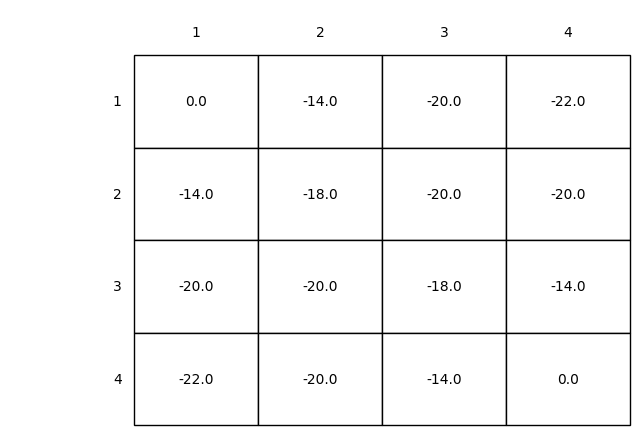

In [4]:
async_values, async_iteration = gw.compute_state_value(action_prob=policy, in_place=True)
gw.draw(np.round(async_values, 2))

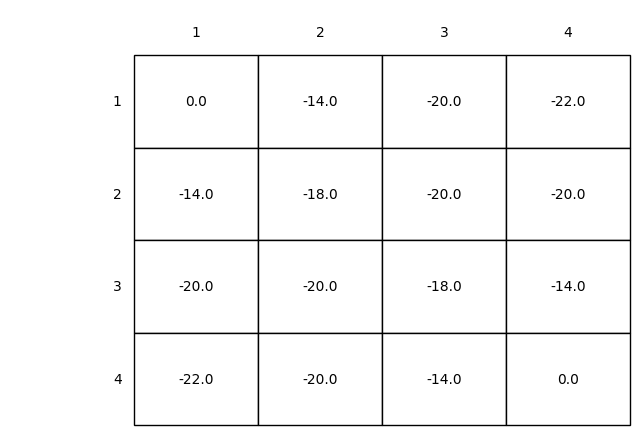

In [5]:
sync_values, sync_iteration = gw.compute_state_value(action_prob=policy, in_place=False)
gw.draw(np.round(sync_values, 2))

In [6]:
print('In-place: {} iterations'.format(async_iteration))
print('Synchronous: {} iterations'.format(sync_iteration))

In-place: 113 iterations
Synchronous: 172 iterations


## **b**) **Pen+Paper exercises** (in all exercises below, assume $\gamma=1$).

**b.1**) If the initial policy $\pi$ is the equiprobable random policy, i.e. $\pi(a\mid s)=0.25,
\forall a
\in \mathcal{A}, s\in\mathcal{S}$, calculate the value of being in state 11 and taking action $\texttt{down}$, $q_{\pi}
(11, \texttt{down})$.

Remember from the lecture that $$q_{\pi}(s, a) =\sum\limits_{s^{\prime}, r} p\left(s^{\prime}, r \mid s, a\right)\left[r+\gamma
v_{\pi}(s)\right]$$
 Then $$q_{\pi}(11, \texttt{down}) = -1 + v_{\pi}(T) = -1$$

**b.2**) What is the value of being in state 7 and taking action $\texttt{down}$?

$$q_{\pi}(7, \texttt{down}) = -1 + v_{\pi}(11) = -1 + (-14) = -15$$

**b.3**) Suppose a new state is added to the gridworld below state 13 and the actions that can be taken from that
state are the same as from any other state and take the agent to: $a = \texttt{up} \rightarrow s'=13$, $a =
\texttt{left} \rightarrow
s'=12$, $a = \texttt{right} \rightarrow s'=14$, $a = \texttt{down} \rightarrow s'=15$. Assume that all transitions from the
original states
 are unchanged. What is $v_{\pi}(15)$ for the equiprobable random policy?

Remember from the lecture that

$$v_{\pi}(s)=\sum\limits_{a} \pi(a \mid s) \sum\limits_{s^{\prime}, r} p\left(s^{\prime}, r \mid s, a\right)
\left[r+\gamma v_{\pi}\left(s^{\prime}\right)\right]$$

Then

$$v_{\pi}(15) = 0.25 \times (-1 + v_{\pi}(13)) + 0.25 \times (-1 + v_{\pi}(12)) + 0.25 \times (-1 + v_{\pi}(14)) + 0.25 \times (-1 + v_{\pi}(15)) \\ = -15 + 0.25 v_{\pi}(15) \Leftrightarrow \\ v_{\pi}
(15)=-20$$

**b.4**) Now suppose the dynamics for state 13 are also changed by the existence of the new state 15. Now, being in
state 13 and moving $\texttt{down}$ takes the agent to state 15. What is the value of state 15, $v_{\pi}(15)?

This change to the dynamics does not affect the value of state 15, so $v_{\pi}(15) = -20$.

**b.5**) Under the changes done in b.4, what is the value of state 13, $v_{\pi}(13)$?

In the original MDP, moving $\texttt{down}$ from state 13 would keep the agent in state 13, because it is a boundary
state, i.e. $s'=13$. If we modify the dynamics such that the target state now becomes 15, $s'=15$, the value of state
 13 is unchanged because $v_{\pi}(13) = v_{\pi}(15) = -20$.

**c**) **Challenge** Re-implement the GridWorld as a `gym` environment and perform synchronous and asynchronous value iteration. If you feel adventurous, you can try to add proper rendering to show the position of the agent in the grid-world.

***Note:*** This is optional. 

---

# 2. Frozen Lake (programming exercise)

**Note:** In the exercises below, you are not given the complete implementations, but instead should try to solve the
exercises. The scaffold is in place and all you need to do is fill in the #TODO fields.
The solutions will be posted on Brightspace after the workgroups.

The Frozen Lake environment is a 4×4 grid which contain four possible areas  — Safe (S), Frozen (F), Hole (H) and Goal (G). The agent moves around the grid until it reaches the goal or the hole. The agent in the environment has four possible moves — Up, Down, Left and Right. If it falls into the hole, it has to start from the beginning and is rewarded the value 0.
The process continues until it learns from every mistake and reaches the goal. Here is a visual description of the Frozen Lake grid task:

![](https://raw.githubusercontent.com/yuzhenqin90/RLcourse/main/WG3/FrozenLake.png)

Note that the ice is slippery, so the agent won't always move in the direction intended by the action. Specifically, there is a 1/3 chance of moving in the direction prescribed by the action and 1/3 to each orthogonal direction.

In [7]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def run_episodes(environment, n_episodes, policy, display=True):
    wins = 0
    total_reward = 0
    for episode in range(n_episodes):
        terminated = False
        state = environment.reset()
        while not terminated:
            # Select an action to perform in a current state (a > 0).all():
            if policy == 'random':
                action = environment.action_space.sample()
            else:
                if isinstance(state, tuple):
                    state = state[0]
                action = np.argmax(policy[state])

            # Perform an action and observe how environment acted in response
            next_state, reward, terminated, truncated, info = environment.step(action)

            # Plot the first episode
            # if episode==1 and display:
            #         print("Action:")
            #         environment.render() # display current agent state
            # Summarize total reward
            total_reward += reward
            # Update current state
            state = next_state
            # Calculate number of wins over episodes
            if terminated and reward == 1.0:
                wins += 1
    average_reward = total_reward / n_episodes
    return wins, total_reward, average_reward

In [9]:
# Load a Frozen Lake environment
env = gym.make("FrozenLake-v1", map_name="4x4")
# Number of episodes to play
n_episodes = 5000
# First episode plotted as a sample episode
print('First episode:')
wins, total_reward, average_reward = run_episodes(env, n_episodes, policy="random")
print('------------------------------------')
print('Summary:')
print(f'- number of wins over {n_episodes} episodes = {wins}')
print(f'- average reward over {n_episodes} episodes = {average_reward}')

First episode:
------------------------------------
Summary:
- number of wins over 5000 episodes = 60
- average reward over 5000 episodes = 0.012


## **a**) Implement the Iterative Policy Evaluation algorithm as a function to evaluate the given policy. How many iterations does the random policy need to converge?

In [10]:
def policy_evaluation(policy, environment, discount_factor=1.0, theta=1e-9, max_iterations=1e9):
    # Number of evaluation iterations
    evaluation_iterations = 1
    # Initialize a value function for each state as zero
    V = np.zeros(environment.observation_space.n)
    # Repeat until change in value is below the threshold
    for i in range(int(max_iterations)):
        # Initialize a change of value function as zero
        delta = 0
        # Iterate through each state
        for state in range(environment.observation_space.n):
            # Initial a new value of current state
            v = 0
            # Try all possible actions which can be taken from this state
            for action, action_probability in enumerate(policy[state]):
                # Check how good next state will be
                for state_probability, next_state, reward, terminated in environment.P[state][action]:
                    # Calculate the expected value
                    v += action_probability * state_probability * (reward + discount_factor * V[next_state])

            # Calculate the absolute change of value function
            delta = max(delta, np.abs(V[state] - v))
            # Update value function
            V[state] = v
        evaluation_iterations += 1

        # Terminate if value change is insignificant
        if delta < theta:
            print(f'Policy evaluated in {evaluation_iterations} iterations.')
            return V

In [11]:
policy = {s: [1./env.action_space.n for _ in range(env.action_space.n)] for s in range(env.observation_space.n)}
policy_evaluation(policy=policy, environment=env)

Policy evaluated in 66 iterations.


/Users/yuzhen.qin/anaconda3/envs/RLcourse/lib/python3.12/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.P to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.P` for environment variables or `env.get_wrapper_attr('P')` that will search the reminding wrappers.
  logger.warn(


array([0.01393979, 0.01163093, 0.02095298, 0.01047649, 0.01624866,
       0.        , 0.04075154, 0.        , 0.0348062 , 0.08816993,
       0.14205316, 0.        , 0.        , 0.17582037, 0.43929118,
       0.        ])

## **b**) Using your `Policy Evaluation` function from (a), implement the Policy iteration algorithm. Run the Policy iteration to obtain the optimal policy for the `FrozenLake-v1` environment.

In [12]:
def one_step_lookahead(environment, state, V, discount_factor):
    action_values = np.zeros(environment.action_space.n)
    for action in range(environment.action_space.n):
        for probability, next_state, reward, terminated in environment.P[state][action]:
            action_values[action] += probability * (reward + discount_factor * V[next_state])
    return action_values

In [13]:
def policy_iteration(environment, discount_factor=1.0, max_iterations=1e9):
    # Start with a random policy
    #num states x num actions / num actions
    policy = {s: [1./env.action_space.n for _ in range(env.action_space.n)] for s in range(env.observation_space.n)}
    # Initialize counter of evaluated policies
    evaluated_policies = 1
    # Repeat until convergence or critical number of iterations reached
    for i in range(int(max_iterations)):
        stable_policy = True
        # Evaluate current policy
        V = policy_evaluation(policy, environment, discount_factor=discount_factor)
        # Go through each state and try to improve actions that were taken (policy Improvement)
        for state in range(environment.observation_space.n):
            # Choose the best action in a current state under current policy
            current_action = np.argmax(policy[state])
            # Look one step ahead and evaluate if current action is optimal
            # We will try every possible action in a current state
            action_value = one_step_lookahead(environment, state, V, discount_factor)
            # Select a better action
            best_action = np.argmax(action_value)
            # If action didn't change
            if current_action != best_action:
                stable_policy = False
                # Greedy policy update
                policy[state] = np.eye(environment.action_space.n)[best_action]
        evaluated_policies += 1
        # If the algorithm converged and policy is not changing anymore, then return final policy and value function
        if stable_policy:
            # print(policy)
            return policy, V

In [14]:
# Number of episodes to play
n_episodes = 1000
iteration_name = "Policy iteration"
iteration_func = policy_iteration
# Load a Frozen Lake environment
env = gym.make("FrozenLake-v1", map_name="4x4")
# Search for an optimal policy using policy iteration
policy, V = iteration_func(env)
# Apply the best policy to the real environment
wins, total_reward, average_reward = run_episodes(env, n_episodes, policy)
print(f'{iteration_name}: number of wins over {n_episodes} episodes = {wins}')
print(f'{iteration_name}: average reward over {n_episodes} episodes = {average_reward} \n\n')

Policy evaluated in 66 iterations.
Policy evaluated in 170 iterations.
Policy evaluated in 428 iterations.


Policy iteration: number of wins over 1000 episodes = 839
Policy iteration: average reward over 1000 episodes = 0.839 




### **c**) Implement the `Value iteration` algorithm. Run the algorithm to obtain the optimal policy for the `FrozenLake-v1` environment.

In [15]:
def value_iteration(environment, discount_factor=1.0, theta=1e-9, max_iterations=1e9):
    # Initialize state-value function with zeros for each environment state
    V = np.zeros(environment.observation_space.n)
    for i in range(int(max_iterations)):
        # Early stopping condition
        delta = 0
        # Update each state
        for state in range(environment.observation_space.n):
            # Do a one-step lookahead to calculate state-action values
            action_value = one_step_lookahead(environment, state, V, discount_factor)
            # Select best action to perform based on the highest state-action value
            best_action_value = np.max(action_value)
            # Calculate change in value
            delta = max(delta, np.abs(V[state] - best_action_value))
            # Update the value function for current state
            V[state] = best_action_value
            # Check if we can stop
        if delta < theta:
            print(f'Value-iteration converged at iteration #{i}.')
            break

    # Create a deterministic policy using the optimal value function
    # policy = np.zeros([environment.observation_space.n, environment.action_space.n])
    policy = {s: [0 for _ in range(env.action_space.n)] for s in range(env.observation_space.n)}
    for state in range(environment.observation_space.n):
        # One step lookahead to find the best action for this state
        action_value = one_step_lookahead(environment, state, V, discount_factor)
        # Select best action based on the highest state-action value
        best_action = np.argmax(action_value)
        # Update the policy to perform a better action at a current state
        policy[state][best_action] = 1.0
    return policy, V

In [16]:
# Number of episodes to play
n_episodes = 1000
iteration_name = "Value iteration"
iteration_func = value_iteration
# Load a Frozen Lake environment
environment = gym.make('FrozenLake-v1', map_name="4x4")
# Search for an optimal policy using policy iteration
policy, V = iteration_func(environment)
# Apply the best policy to the real environment
wins, total_reward, average_reward = run_episodes(environment, n_episodes, policy)
print(f'{iteration_name}: number of wins over {n_episodes} episodes = {wins}')
print(f'{iteration_name}: average reward over {n_episodes} episodes = {average_reward} \n\n')

Value-iteration converged at iteration #523.
Value iteration: number of wins over 1000 episodes = 817
Value iteration: average reward over 1000 episodes = 0.817 




**d**) Compare two optimal policies in part (b) and (c). Which seems to converge faster and why?


In [17]:
# Number of episodes to play
n_episodes = 5000
# Functions to find best policy
solvers = [('Policy Iteration', policy_iteration),
           ('Value Iteration', value_iteration)]
for iteration_name, iteration_func in solvers:
    # Load a Frozen Lake environment
    environment = gym.make("FrozenLake-v1", map_name="4x4")
    # Search for an optimal policy using policy iteration
    policy, V = iteration_func(environment.env)
    # Apply the best policy to the real environment
    wins, total_reward, average_reward = run_episodes(environment, n_episodes, policy, display=False)
    print(f'{iteration_name} :: number of wins over {n_episodes} episodes = {wins}')
    print(f'{iteration_name} :: average reward over {n_episodes} episodes = {average_reward} \n\n')

Policy evaluated in 66 iterations.
Policy evaluated in 170 iterations.
Policy evaluated in 428 iterations.
Policy Iteration :: number of wins over 5000 episodes = 4134
Policy Iteration :: average reward over 5000 episodes = 0.8268 


Value-iteration converged at iteration #523.
Value Iteration :: number of wins over 5000 episodes = 4161
Value Iteration :: average reward over 5000 episodes = 0.8322 


